## Valores atípicos (outliers)

Aunque existen fórmulas estadísticas que involucran el cálculo de medias y desviaciones estándar hay que recordar que a veces este tipo de cálculos asumen que la distribución de datos es normal, en la práctica esto requiere mucho trabajo comprobarlo, por lo tanto una forma rápida de encontrar valores atípicos en los datos es por medio de un método visual, graficando histogramas o diagramas de caja y bigotes

In [1]:
# Con datos generados de Twitter mostraré una manera rápida de encontrar valores atípicos en una variable numérica de un dataset
import pandas as pd

# Primero leemos los datos del archivo de texto. Se tomará la variable numérica 'impresiones' para hacer la demostración
df = pd.read_csv('C:/HOME/DATA ANALYSIS/tweet_activity_metrics_rdvillal_20211118_20211216_es.csv')
df.head(3)

,ID del Tweet,Enlace permanente de Tweet,Texto del Tweet,hora,impresiones,interacciones,tasa de interacción,retweets,respuestas,me gusta,...,clics de etiquetas promocionado,ampliaciones de detalles promocionado,clics en enlaces permanentes promocionado,Se abre la aplicación promocionado,descargas de app promocionado,seguimientos promocionado,enviar Tweet por correo electrónico promocionado,marcar teléfono promocionado,visualizaciones multimedia promocionado,interacciones con el contenido multimedia promocionado
0,1471230310914433032,https://twitter.com/rdvillal/status/1471230310...,Yo creía que aquella mujer estaba loca. Luego ...,2021-12-15 21:26 +0000,11.0,0.0,0.0,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1468299003443953666,https://twitter.com/rdvillal/status/1468299003...,"Allá, de donde venimos ahora, al menos te entr...",2021-12-07 19:18 +0000,68.0,0.0,0.0,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
2,1468297844306161673,https://twitter.com/rdvillal/status/1468297844...,Hay pueblos que saben a desdicha. Se les conoc...,2021-12-07 19:14 +0000,63.0,0.0,0.0,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-


# 1. Graficando un histograma de la variable transformada

podemos ver algunas estadísticas descriptivas para ir comprendiendo la variable. Notemos que el valor mínimo es 11 y el máximo 17448, con una media de 419.05 y una desviación estándar de 2345.86. El percentil 75 tiene un valor de 91.5, es decir que el 75% de los datos reflejan valores inferiores a 91.5 en esta variable

In [2]:
df['impresiones'].describe()

count       55.000000
mean       419.054545
std       2345.864552
min         11.000000
25%         43.500000
50%         68.000000
75%         91.500000
max      17448.000000
Name: impresiones, dtype: float64

<AxesSubplot:xlabel='impresiones', ylabel='Count'>

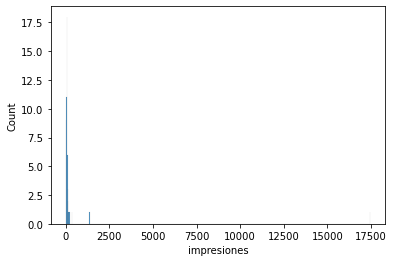

In [4]:
# intentemos ahora graficar un histograma con esta variable, para ello utilizaré la librería seaborn
import seaborn as sbs

sbs.histplot(df['impresiones'])

Como puede verse en la gráfica, los altos valores que toma la variable *impresiones* distorsiona la escala y hace difícil entender los datos al graficarlos así, por lo tanto, usaré la función de logaritmo natural **np.log()** para transformar los valores y obtener una mejor visualización. Esta función se encuentra en la librería **Numpy**

<AxesSubplot:xlabel='impresiones', ylabel='Count'>

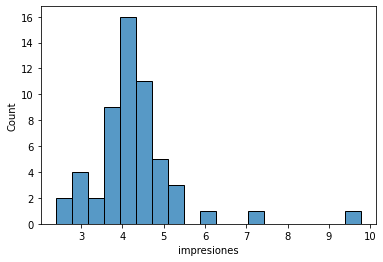

In [5]:
import numpy as np

sbs.histplot(np.log(df['impresiones']))

Con la transformación ya puede observarse un gráfico que facilita la detección de valores atípicos. Sin embargo, ya que he hecho dicha transformación, para obtener el umbral deseado puede aplicarse la función inversa **exp()** sobre los valores observados en la gráfica anterior. Para tener una referencia podría partirse del **exp(7)**

In [6]:
np.exp(7)

1096.6331584284585

In [7]:
# ahora filtramos en el dataFrame original
df[df['impresiones']>1096.63]

,ID del Tweet,Enlace permanente de Tweet,Texto del Tweet,hora,impresiones,interacciones,tasa de interacción,retweets,respuestas,me gusta,...,clics de etiquetas promocionado,ampliaciones de detalles promocionado,clics en enlaces permanentes promocionado,Se abre la aplicación promocionado,descargas de app promocionado,seguimientos promocionado,enviar Tweet por correo electrónico promocionado,marcar teléfono promocionado,visualizaciones multimedia promocionado,interacciones con el contenido multimedia promocionado
41,1461742522171068419,https://twitter.com/rdvillal/status/1461742522...,@PatriciaLinar16 @AlexiaRivasG1 Para dejar de ...,2021-11-19 17:05 +0000,1361.0,33.0,0.024247,1.0,2.0,10.0,...,-,-,-,-,-,-,-,-,-,-
51,1461184555856150531,https://twitter.com/rdvillal/status/1461184555...,@La_Grumos @schippers22 Admiro la valentía con...,2021-11-18 04:08 +0000,17448.0,241.0,0.013812,1.0,5.0,144.0,...,-,-,-,-,-,-,-,-,-,-


# 2. Con un diagrama de Caja y bigotes (BoxPlot)

Otro gráfico que pudo haberse utilizado para lograr esto es el diagrama de caja y bigotes. El procedimiento a realizar es el mismo para evitar que los valores atípicos distorsionen la escala de la visualización.  

<AxesSubplot:ylabel='impresiones'>

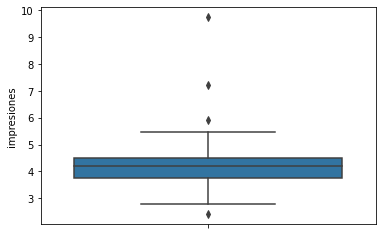

In [9]:
sbs.boxplot(y=np.log(df['impresiones']))

Como puede observarse el resultado es similar. Aquí los valores atípicos aparecen representados como los puntos y vemos que hay tres. Uno de los cuales se encuentra levemente debajo del 6. Verifiquemos el valor con la función exp

In [10]:
np.exp(6)

403.4287934927351

In [11]:
# ahora filtramos
df[df['impresiones']>403]

,ID del Tweet,Enlace permanente de Tweet,Texto del Tweet,hora,impresiones,interacciones,tasa de interacción,retweets,respuestas,me gusta,...,clics de etiquetas promocionado,ampliaciones de detalles promocionado,clics en enlaces permanentes promocionado,Se abre la aplicación promocionado,descargas de app promocionado,seguimientos promocionado,enviar Tweet por correo electrónico promocionado,marcar teléfono promocionado,visualizaciones multimedia promocionado,interacciones con el contenido multimedia promocionado
41,1461742522171068419,https://twitter.com/rdvillal/status/1461742522...,@PatriciaLinar16 @AlexiaRivasG1 Para dejar de ...,2021-11-19 17:05 +0000,1361.0,33.0,0.024247,1.0,2.0,10.0,...,-,-,-,-,-,-,-,-,-,-
51,1461184555856150531,https://twitter.com/rdvillal/status/1461184555...,@La_Grumos @schippers22 Admiro la valentía con...,2021-11-18 04:08 +0000,17448.0,241.0,0.013812,1.0,5.0,144.0,...,-,-,-,-,-,-,-,-,-,-


In [14]:
# ya que observamos que aparecen los mismos dos valores probemos con 5.5 (ya que no alcanzamos a ver el punto exacto en la 
# gráfica, sin embargo se ve que es superior a 5 y por debajo de 6)
np.exp(5.5)

244.69193226422038

In [15]:
# ahora filtramos
df[df['impresiones']>244]

,ID del Tweet,Enlace permanente de Tweet,Texto del Tweet,hora,impresiones,interacciones,tasa de interacción,retweets,respuestas,me gusta,...,clics de etiquetas promocionado,ampliaciones de detalles promocionado,clics en enlaces permanentes promocionado,Se abre la aplicación promocionado,descargas de app promocionado,seguimientos promocionado,enviar Tweet por correo electrónico promocionado,marcar teléfono promocionado,visualizaciones multimedia promocionado,interacciones con el contenido multimedia promocionado
19,1464227551010770949,https://twitter.com/rdvillal/status/1464227551...,@KarenMorenoPala Pero hay que hacer lo que ell...,2021-11-26 13:40 +0000,376.0,1.0,0.002660,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
41,1461742522171068419,https://twitter.com/rdvillal/status/1461742522...,@PatriciaLinar16 @AlexiaRivasG1 Para dejar de ...,2021-11-19 17:05 +0000,1361.0,33.0,0.024247,1.0,2.0,10.0,...,-,-,-,-,-,-,-,-,-,-
51,1461184555856150531,https://twitter.com/rdvillal/status/1461184555...,@La_Grumos @schippers22 Admiro la valentía con...,2021-11-18 04:08 +0000,17448.0,241.0,0.013812,1.0,5.0,144.0,...,-,-,-,-,-,-,-,-,-,-


De este modo alcanzamos a detectar un nuevo valor atípico: 376. Ahora podemos tomar este dato como un filtro para calcular la media o realizar otros cálculos con nuestros datos evitando que se sesguen, incluso podemos graficar los datos en su escala original pero filtrando estos valores y observaremos importantes diferencias

<AxesSubplot:xlabel='impresiones', ylabel='Count'>

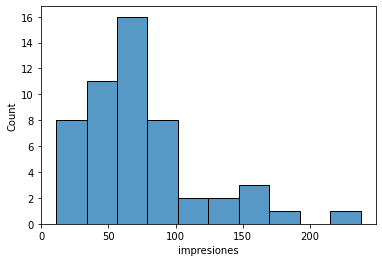

In [21]:
# Por ejemplo graficando el histograma pero filtrando los valores por debajo de 376 que es el menor de los valores atípicos 
# encontrados previamente

sbs.histplot(data=df[df['impresiones']<376.0], x='impresiones')

<AxesSubplot:ylabel='impresiones'>

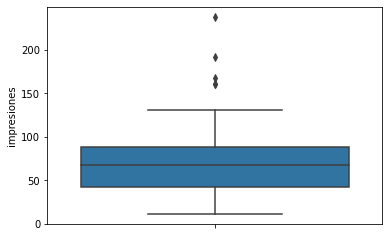

In [22]:
# También podemos aplicarlo al boxplot. En este caso incluso observaremos que se calcularán nuevos valores atípicos en el 
# nuevo rango que se ha delimitado

sbs.boxplot(data=df[df['impresiones']<376.0], y='impresiones')